## Customer Segmentation using K-Means clustering

### Data Preprocessing

In [53]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [54]:
file_path = "/Users/jenniferklein/Documents/Projects/mall_customer-segmentation/Mall_Customers.csv"
data = pd.read_csv(file_path, index_col=0)

In [55]:
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


Text(0.5, 1.0, 'Boxplot of Annual Income (k$)')

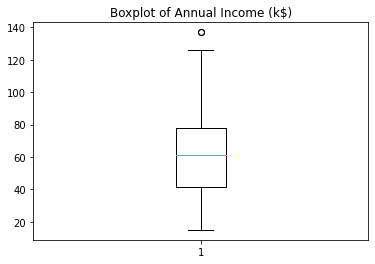

In [56]:
# checking data for Annual Income outliers using a boxplot
plt.boxplot(data['Annual Income (k$)'])
plt.title('Boxplot of Annual Income (k$)')

In [57]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [58]:
# handle outliers with the inner quartile range method (IQR)
# define 1st, 2nd and 3rd quartiles of Annual Income

Q1 = np.percentile(data['Annual Income (k$)'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Annual Income (k$)'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Annual Income (k$)'], 75, interpolation='midpoint')

In [59]:
#calculate IQR and upper and lower quartiles

IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

IQR, lower_limit, upper_limit

(37.0, -14.5, 133.5)

In [60]:
# loop through values outside of lower and upper limits to create
# list of outliers

outlier=[]
for x in data['Annual Income (k$)']:
    if((x>upper_limit) or (x<lower_limit)):
        outlier.append(x)
        
outlier

[137, 137]

In [61]:
# annual incomes of $137,000 are outliers in the dataset

In [62]:
# isolate outliers in rows in dataframe and drop them
outlier_index=data['Annual Income (k$)']>upper_limit
data.loc[outlier_index].index

Int64Index([199, 200], dtype='int64', name='CustomerID')

In [63]:
data.drop([199,200], inplace=True)

In [64]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
194,Female,38,113,91
195,Female,47,120,16
196,Female,35,120,79


### Exploratory Data Analysis

#### Univariate Analysis

/Users/jenniferklein/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

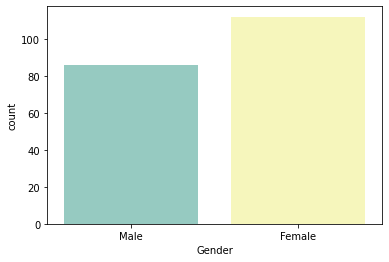

In [65]:
# bar graph using count
sns.countplot(data['Gender'], palette="Set3")


/Users/jenniferklein/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

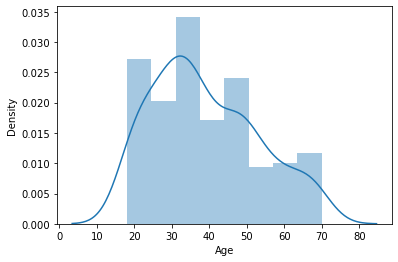

In [66]:
sns.distplot(data['Age'])

#### Bivariate Analysis

In [67]:
# convert gender from categorical feature to numerical
# in order to do bivariate analysis

gender = {'Male':0, 'Female':1}
data['Gender']= data['Gender'].map(gender)

Text(0.5, 1.0, 'Age vs. Spending Score')

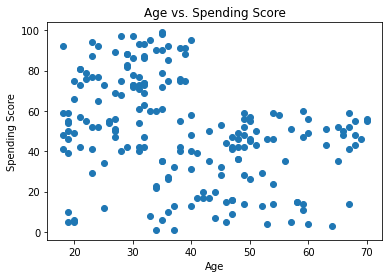

In [68]:
# scatter plot of age by spending score
plt.scatter(data['Age'], data['Spending Score (1-100)'], marker='o')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs. Spending Score')

In [69]:
# lower age is correlated with higher spending score

Text(0.5, 1.0, 'Age vs. Annual Income')

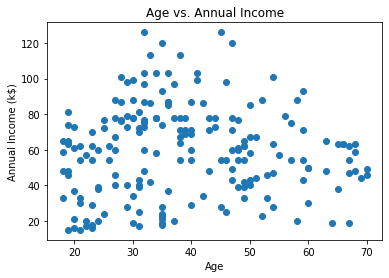

In [70]:
# scatter plot of age by annual income
plt.scatter(data['Age'], data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs. Annual Income')

In [71]:
# people between 30-50 have highest annual income

Text(0.5, 1.0, 'Income vs. Spending Score')

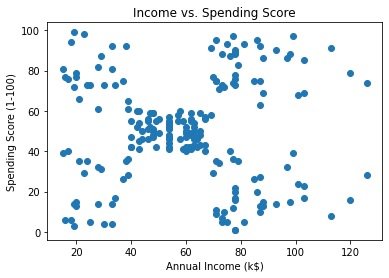

In [72]:
# scatter plot of spending score by annual income
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs. Spending Score')

In [73]:
# people with an annual income of $40-$60k have a corresponding 
# spending score of 40-60

Text(0.5, 1.0, 'Gender vs. Income')

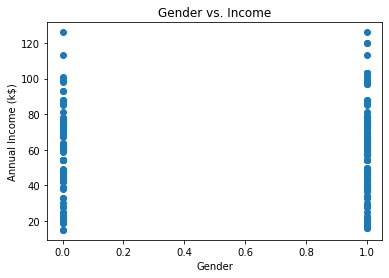

In [74]:
# scatter plot of gender by annual income
plt.scatter(data['Gender'], data['Annual Income (k$)'])
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.title('Gender vs. Income')

In [75]:
# significant relationship between gender and income

Text(0.5, 1.0, 'Gender vs. Spending Score')

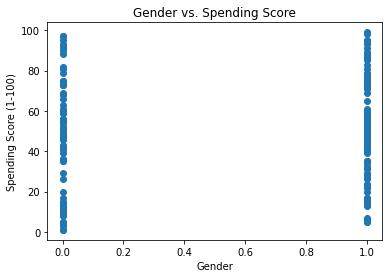

In [76]:
# scatter plot of gender by annual income
plt.scatter(data['Gender'], data['Spending Score (1-100)'])
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Gender vs. Spending Score')

In [77]:
# Females (mapped to 1) have slightly higher spending scores than makes

Text(0.5, 1.0, 'Gender vs. Age')

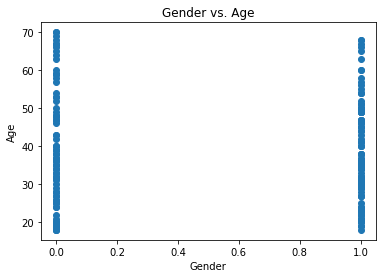

In [78]:
# scatter plot of gender by age
plt.scatter(data['Gender'], data['Age'])
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Gender vs. Age')

In [79]:
# there are some slightly older males but generally the age
# distribution is even

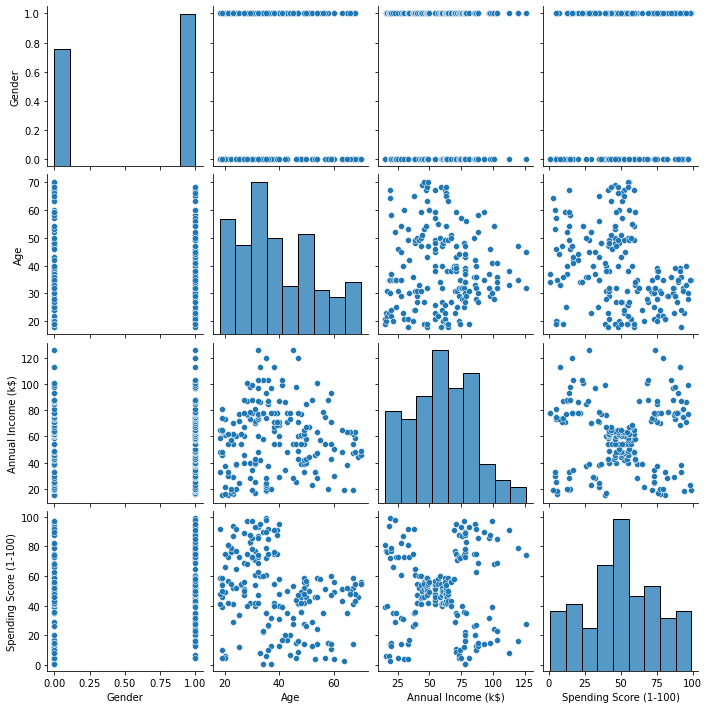

In [80]:
sns.pairplot(data)

#### Multivariate Analysis

<AxesSubplot:>

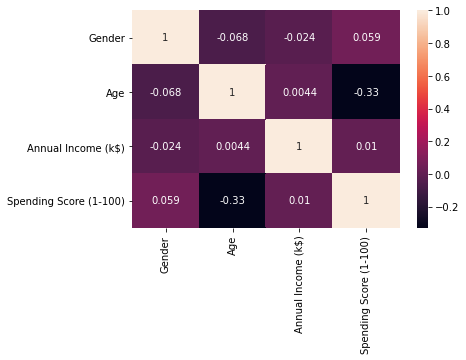

In [81]:
sns.heatmap(data.corr(), annot=True)

In [82]:
# age and spending score have the most significant relationship
# of the variables, a negative correlation 

#### Standardizing variables

In [83]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age','Annual Income (k$)', 'Spending Score (1-100)']])
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40
...,...,...,...,...
194,1,38,113,91
195,1,47,120,16
196,1,35,120,79


In [84]:
# create copy of the data
x = data.copy()
kmeans = KMeans(3)

# Fit the data
kmeans.fit(x)

KMeans(n_clusters=3)

In [85]:
# create copy of fitted data
clusters = x.copy()

# new column with predicted clusters
clusters['cluster_pred'] = kmeans.fit_predict(x)
clusters

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_pred
CustomerID,,,,,
1,0,19,15,39,1
2,0,21,15,81,1
3,1,20,16,6,1
4,1,23,16,77,1
5,1,31,17,40,1
...,...,...,...,...,...
194,1,38,113,91,2
195,1,47,120,16,0
196,1,35,120,79,2


Text(0.5, 1.0, 'Fitted Data: Income vs. Spending Score')

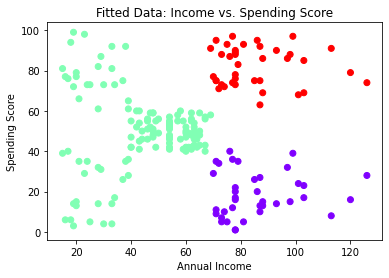

In [86]:
# Plot the data using income + spending score
plt.scatter(clusters['Annual Income (k$)'], clusters['Spending Score (1-100)'], c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Fitted Data: Income vs. Spending Score')

Text(0, 0.5, 'within Clusters Sum of Squares(WCSS)')

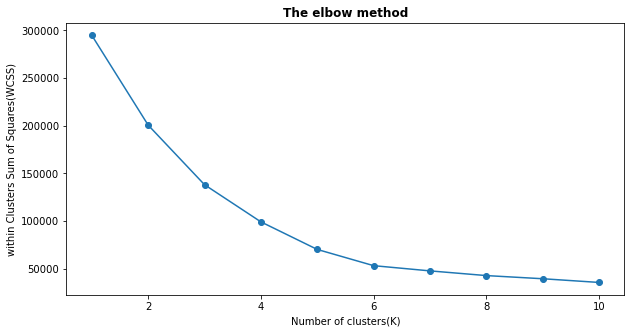

In [87]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(clusters)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
    
# Plotting the results onto a line graph to help us observe 'The Elbow'
plt.figure(figsize=(10,5))
no_clusters=range(1,11)
plt.plot(no_clusters, wcss,marker = "o")
plt.title('The elbow method', fontweight="bold")
plt.xlabel('Number of clusters(K)')
plt.ylabel('within Clusters Sum of Squares(WCSS)')

In [88]:
# optimal number of clusters is 5

In [89]:
# calculate silhouette score to confirm cluster number is ideal
print(silhouette_score(clusters, kmeans.labels_, metric='euclidean'))

0.38332267705818757


In [90]:
# create new dataframe with predicted clusters
# and map categorical feature 'Gender' back to its initial categories

kmeans_new = KMeans(5)
#Fit the data
kmeans_new.fit(x)

#create new df with predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x)


In [91]:
# mapping gender variable back to male/female
gender= {0:'Male', 1:'Female'}
clusters_new['Gender']= clusters_new['Gender'].map(gender)
clusters_new

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_pred
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,3
3,Female,20,16,6,4
4,Female,23,16,77,3
5,Female,31,17,40,4
...,...,...,...,...,...
194,Female,38,113,91,2
195,Female,47,120,16,0
196,Female,35,120,79,2


Text(0, 0.5, 'Spending Score')

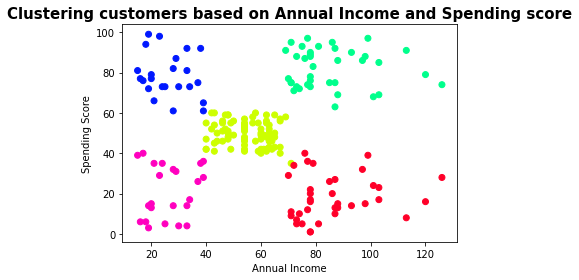

In [92]:
# plot the data with predicted clusters
plt.scatter(clusters_new['Annual Income (k$)'], 
           clusters_new['Spending Score (1-100)'], 
           c=clusters_new['cluster_pred'],
           cmap= 'gist_rainbow')
plt.title("Clustering customers based on Annual Income and Spending score", 
             fontsize=15, fontweight="bold")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [93]:
# gaining better understanding of clusters
# starting by finding asverage of all features across each cluster

avg_data = clusters_new.groupby(['cluster_pred'],as_index=False).mean()
avg_data

,cluster_pred,Age,Annual Income (k$),Spending Score (1-100)
0,0,40.555556,86.055556,18.194444
1,1,43.282051,55.025641,49.692308
2,2,32.763158,85.210526,82.105263
3,3,25.521739,26.304348,78.565217
4,4,45.217391,26.304348,20.913043


<AxesSubplot:xlabel='cluster_pred', ylabel='Age'>

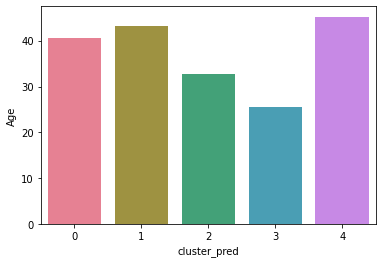

In [94]:
# visualize averages above 
# age vs predicted clusters
sns.barplot(x='cluster_pred',y='Age',palette="husl",data=avg_data)


<AxesSubplot:xlabel='cluster_pred', ylabel='Annual Income (k$)'>

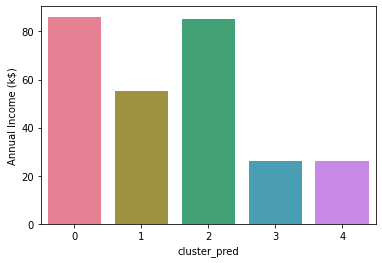

In [95]:
# income vs predicted clusters
sns.barplot(x='cluster_pred',y='Annual Income (k$)',palette="husl",data=avg_data)


<AxesSubplot:xlabel='cluster_pred', ylabel='Spending Score (1-100)'>

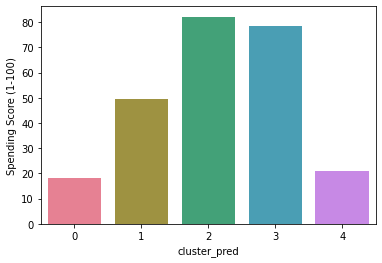

In [96]:
# spending score vs predicted clusters
sns.barplot(x='cluster_pred',y='Spending Score (1-100)',palette="husl",data=avg_data)


In [97]:
# gender breakdown
data2 = pd.DataFrame(clusters_new.groupby(['cluster_pred', 'Gender'])['Gender'].count())
data2

Gender
cluster_pred Gender        
0            Female      18
             Male        18
1            Female      45
             Male        33
2            Female      21
             Male        17
3            Female      14
             Male         9
4            Female      14
             Male         9

### Cluster Analysis

Cluster 0: High-earning Frugal Beagles
Average age is 41 years; Average Annual Income is $86k; equal males and females; Avg Spending Score is 18

Cluster 1: Middle of the pack
Average age is 43 years; Average Annual Income is $55k; pre-dominantly female; Avg Spending Score is 50

Cluster 2: Lavish
Average age is 32 years; Average Annual Income is $85k; pre-dominantly female; Avg Spending Score is 82

Cluster 3: Low-earning frugal Beagles
Average age is 25 years; Average Annual Income is $26k; pre-dominantly female; Avg Spending Score is 78

Cluster 4: Careless spenders
Average age is 45 years; Average Annual Income is $26k; pre-dominantly female; Avg Spending Score is 20